In [ ]:

https://stats.idre.ucla.edu/other/mult-pkg/whatstat/

https://cyfar.org/types-statistical-tests
    
https://www.itl.nist.gov/div898/handbook/prc/section1/prc13.htm

    https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

In [6]:
import pandas as pd

df = pd.read_csv('data/titanic-passengers.csv', delimiter=';', index_col='PassengerId')

In [35]:
df.shape

(891, 12)

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
155,No,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
162,Yes,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
163,No,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S
227,Yes,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
241,No,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


In [33]:
df_fixed_age = df.drop(df[df['Age'] < 1.0].index).dropna()

In [34]:
df_fixed_age.shape

(182, 12)

In [ ]:
## Examples from here:
# https://github.com/EikeDehling/machine-learnings/blob/master/exploratory_data_analysis_titanic.ipynb

In [3]:
import seaborn as sns
%matplotlib inline

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


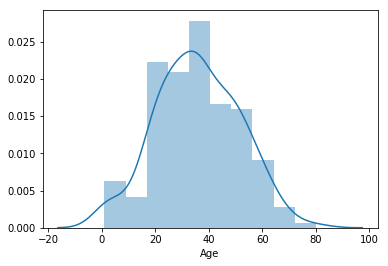

In [37]:
sns.distplot(df_fixed_age['Age'])

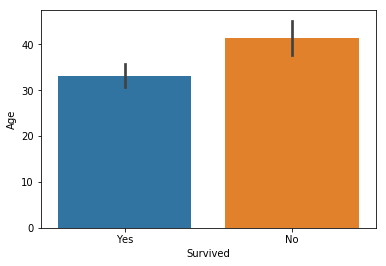

In [40]:
sns.barplot(x=df_fixed_age['Survived'], y=df_fixed_age['Age'])

In [41]:
from scipy.stats import ttest_ind

ttest_ind(df_fixed_age[df_fixed_age['Survived'] == 'Yes']['Age'],
          df_fixed_age[df_fixed_age['Survived'] == 'No']['Age'])

Ttest_indResult(statistic=-3.4535781226809537, pvalue=0.0006896967547508567)

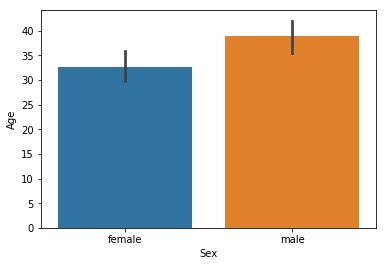

In [42]:
sns.barplot(x=df_fixed_age['Sex'], y=df_fixed_age['Age'])

In [43]:
ttest_ind(df_fixed_age[df_fixed_age['Sex'] == 'male']['Age'],
          df_fixed_age[df_fixed_age['Sex'] == 'female']['Age'])

Ttest_indResult(statistic=2.738579097536149, pvalue=0.006790860503799806)

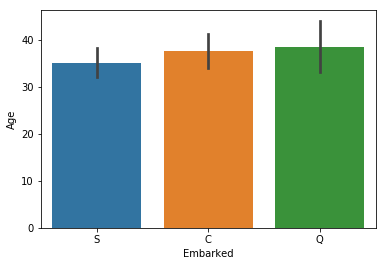

In [47]:
sns.barplot(x=df_fixed_age['Embarked'], y=df_fixed_age['Age'])

In [49]:
from scipy.stats import f_oneway

f_oneway(df_fixed_age[df_fixed_age['Embarked'] == 'S']['Age'],
         df_fixed_age[df_fixed_age['Embarked'] == 'C']['Age'],
         df_fixed_age[df_fixed_age['Embarked'] == 'Q']['Age'])


F_onewayResult(statistic=0.5880904412503826, pvalue=0.5564562439425071)

In [23]:
contingency_table = pd.crosstab(df['Sex'], df['Survived'])

In [24]:
contingency_table

Survived,No,Yes
Sex,,
female,81,233
male,468,109


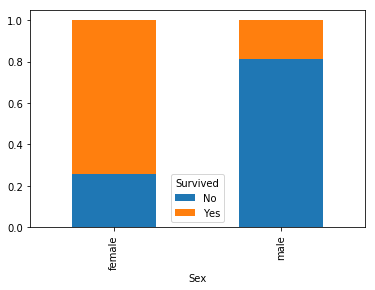

In [21]:
_ = contingency_table.apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

In [22]:
from scipy.stats import chi2_contingency

chi2, p, dof, _ = chi2_contingency(contingency_table)

print("Chi^2 = {:.1f}, P-value = {:.2f}, DoF = {}".format(chi2, p, dof))

Chi^2 = 260.7, P-value = 0.00, DoF = 1


The test confirms what is obvious from the plot: This difference is very very unlikely to observe by chance. There is a difference in survival ratio between males and females.